## Figure S10: Posterior Distribution

This code creates Figure S10 that visualizes the posterior distribution over parameters of the model.


In [1]:
import numpy as np
import pickle
import seaborn as sns
from scipy.integrate import odeint
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as sio
import pystan #Python interface for Stan (Stan implements Hamiltonian Monte Carlo)

In [2]:
#Print working directory and change it if needed. All data files should be in your working directory.
#import os
#print(os.getcwd())
#os.chdir('...enter the address to your directory here...')

#Load the fitting (inference) data from a saved pickle file
with open("fitResults1.pkl", "rb") as f:
    data_dict = pickle.load(f)
    
stanModel  = data_dict['model']
fitData = data_dict['fit']  

In [3]:
# Get the MAP (Maximum A Posteriori) estimate
trace = fitData.extract() #trace is a dictionary that contains samples and log of the posterior distribution
trace.keys()
index_MAP = np.argmax(trace['lp__']) #Finds the index of the parameters with maximum log posterior
MAP_pars = trace['theta'][index_MAP,:]

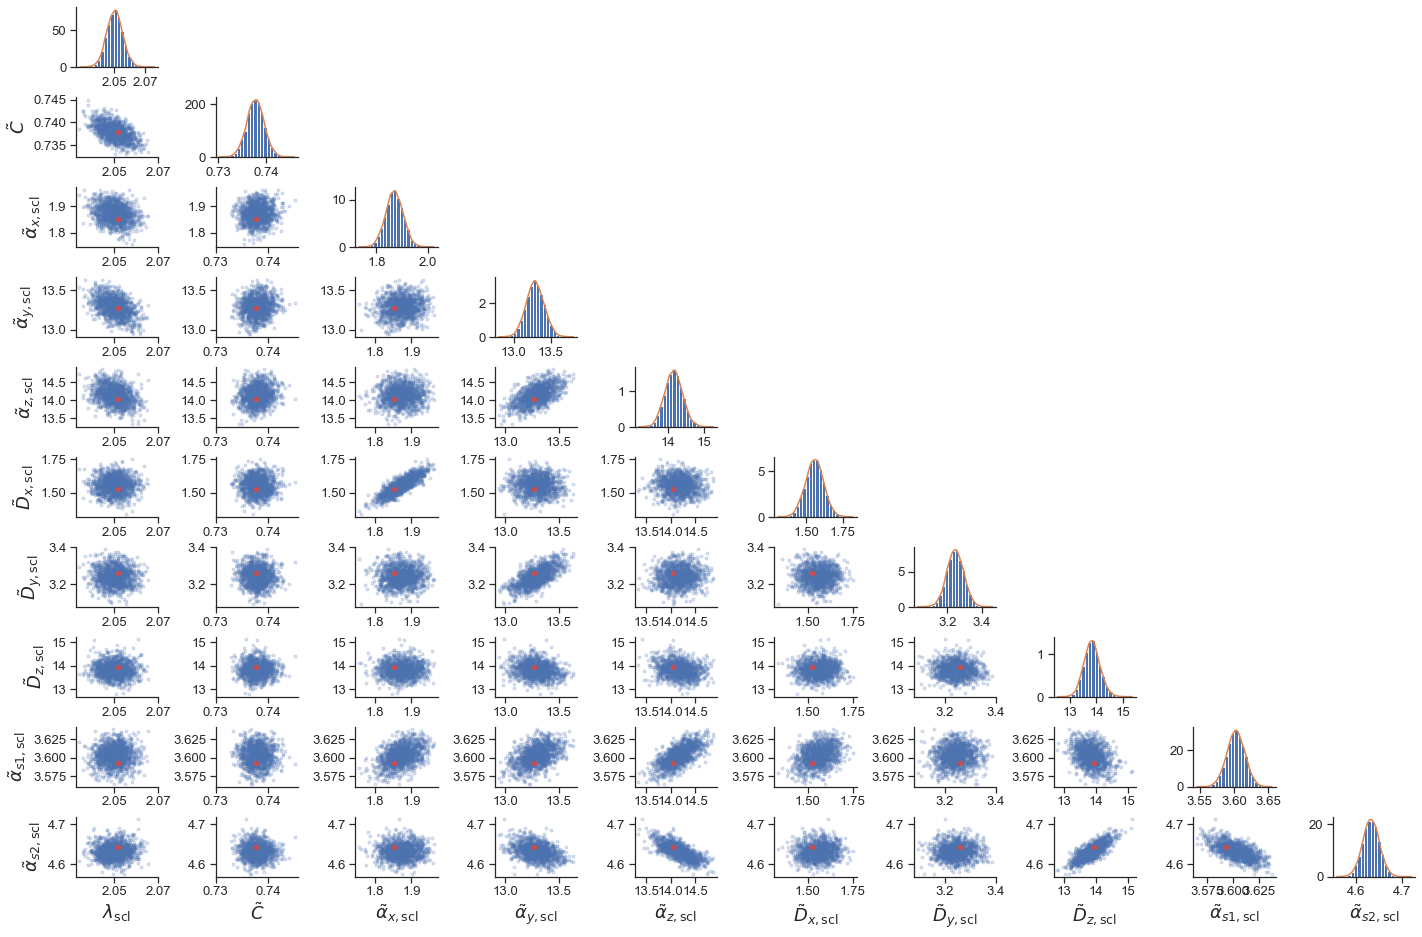

In [4]:
#Visualize the posterior distribution
sns.set()
sns.set(font_scale=1.2)
sns.set_style('ticks')
red_colors = sns.color_palette("Reds_d",9)
blue_colors = sns.color_palette("Blues_d",9)
orange_colors = sns.color_palette("YlOrBr_d",9)

fig_p = plt.figure(figsize=(24,16))
n_par=len(MAP_pars)
n_samples = len(trace['theta'][:,0])
par_names=['$\lambda_{\mathrm{scl}}$',r'$\tilde{C}$',r'$\tilde{\alpha}_{x,\mathrm{scl}}$',r'$\tilde{\alpha}_{y,\mathrm{scl}}$', \
           r'$\tilde{\alpha}_{z,\mathrm{scl}}$',r'$\tilde{D}_{x,\mathrm{scl}}$',r'$\tilde{D}_{y,\mathrm{scl}}$', \
           r'$\tilde{D}_{z,\mathrm{scl}}$',r'$\tilde{\alpha}_{s1,\mathrm{scl}}$',r'$\tilde{\alpha}_{s2,\mathrm{scl}}$']
plt.subplot(n_par,n_par,1)
plt.hist(trace['theta'][:,0], 20, density=True); 
sns.kdeplot(trace['theta'][:,0], shade=True)
plt.xticks([2.05, 2.07])
sns.despine()
for p in range(1,n_par):
    for q in range(p):
        plt.subplot(n_par,n_par,p*n_par+q+1)
        par1=trace['theta'][range(0,n_samples,10), q] #Chooses one sample every 10 samples to draw the pairwise posteriors. This is to prevent making a very large picture.
        par2=trace['theta'][range(0,n_samples,10), p]
        plt.plot(par1, par2, marker='.', linestyle='None', alpha=0.2)
        plt.plot(MAP_pars[q], MAP_pars[p], marker='.', color='r', markersize=9)
        sns.despine()
        if q==0:
            plt.ylabel(par_names[p], fontsize=18)
            plt.xticks([2.05, 2.07])
        if q==1:
            plt.xticks([0.73, 0.74])    
        if p==n_par-1:
            plt.xlabel(par_names[q], fontsize=18)
    plt.subplot(n_par,n_par,p*n_par+p+1)
    plt.hist(trace['theta'][:,p], 20, density=True); 
    sns.kdeplot(trace['theta'][:,p], shade=True)    
    sns.despine()
    if p==n_par-1:
        plt.xlabel(par_names[p], fontsize=18)

#export figure
fig_p.subplots_adjust(wspace=0.7, hspace=0.5)
fig_p.savefig("FigS10_posterior_small.pdf", bbox_inches='tight', transparent=True)    